# PRCP-1003-Customer Transaction Prediction¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load The Dataset

In [2]:
df = pd.read_csv('train(1).csv')

In [3]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
#In this Dataset there are one target column and other are customer transaction we have to see that what type customer are 
#repetative and which are not as of now dataset are seing

In [5]:
df.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [6]:
# checked shape of the dataset
df.shape

(200000, 202)

In [7]:
# In that we seen that 200000 row and 202 are column

In [8]:
# check the dtype and any missing value are present or not 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [9]:
# In that we seen dtype are float,int64,object

In [10]:
# Checked null values and sum of null values
df.isnull()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [12]:
df.isnull().sum()/len(df)*100

ID_code    0.0
target     0.0
var_0      0.0
var_1      0.0
var_2      0.0
          ... 
var_195    0.0
var_196    0.0
var_197    0.0
var_198    0.0
var_199    0.0
Length: 202, dtype: float64

In [13]:
# We seing that no null values are present in the dataset and no missing values are there 

In [14]:
# lets see our target values 0 and 1 lets count them
df['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

In [15]:
# lets see them in percentage of (0,1)
df['target'].value_counts(normalize=True)

target
0    0.89951
1    0.10049
Name: proportion, dtype: float64

In [16]:
df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

## Drop ID column (not a useful feature)

In [17]:
df=df.drop(columns=['ID_code'])

In [18]:
df.columns

Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [19]:
df.shape

(200000, 201)

In [20]:
# ID_code column are remove because ID_code column not usefull they only for no.of rows showcase 

## Separate features (X) and label (y)

In [21]:
# All columns that start with "var_" are features
feature_cols = [c for c in df.columns if c.startswith("var_")]
X=df[feature_cols]
Y=df['target'].astype(int)

In [22]:
X.shape

(200000, 200)

In [23]:
Y.shape

(200000,)

## Quick summary of some features

In [24]:
X[feature_cols[:5]].describe()

,var_0,var_1,var_2,var_3,var_4
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333
std,3.040051,4.050044,2.640894,2.043319,1.623150
min,0.408400,-15.043400,2.117100,-0.040200,5.074800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175
50%,10.524750,-1.608050,10.580000,6.825000,11.108250
75%,12.758200,1.358625,12.516700,8.324100,12.261125
max,20.315000,10.376800,19.353000,13.188300,16.671400


In [25]:
#Helps you see the range and spread for a few var_ columns

In [26]:
#Simple outlier handling with IQR capping

In [27]:
X_capped = X.copy()
for col in feature_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    X_capped[col] = X[col].clip(lower, upper)

In [28]:
X_capped[feature_cols[0]].head(10)

0     8.9255
1    11.5006
2     8.6093
3    11.0604
4     9.8369
5    11.4763
6    11.8091
7    13.5580
8    16.1071
9    12.5088
Name: var_0, dtype: float64

In [29]:
#Compute Q1 (25%), Q3 (75%), IQR = Q3−Q1.

#Define allowed range: [Q1 − 1.5*IQR, Q3 + 1.5*IQR].

#Values outside range are “outliers” and are clipped to the boundary.

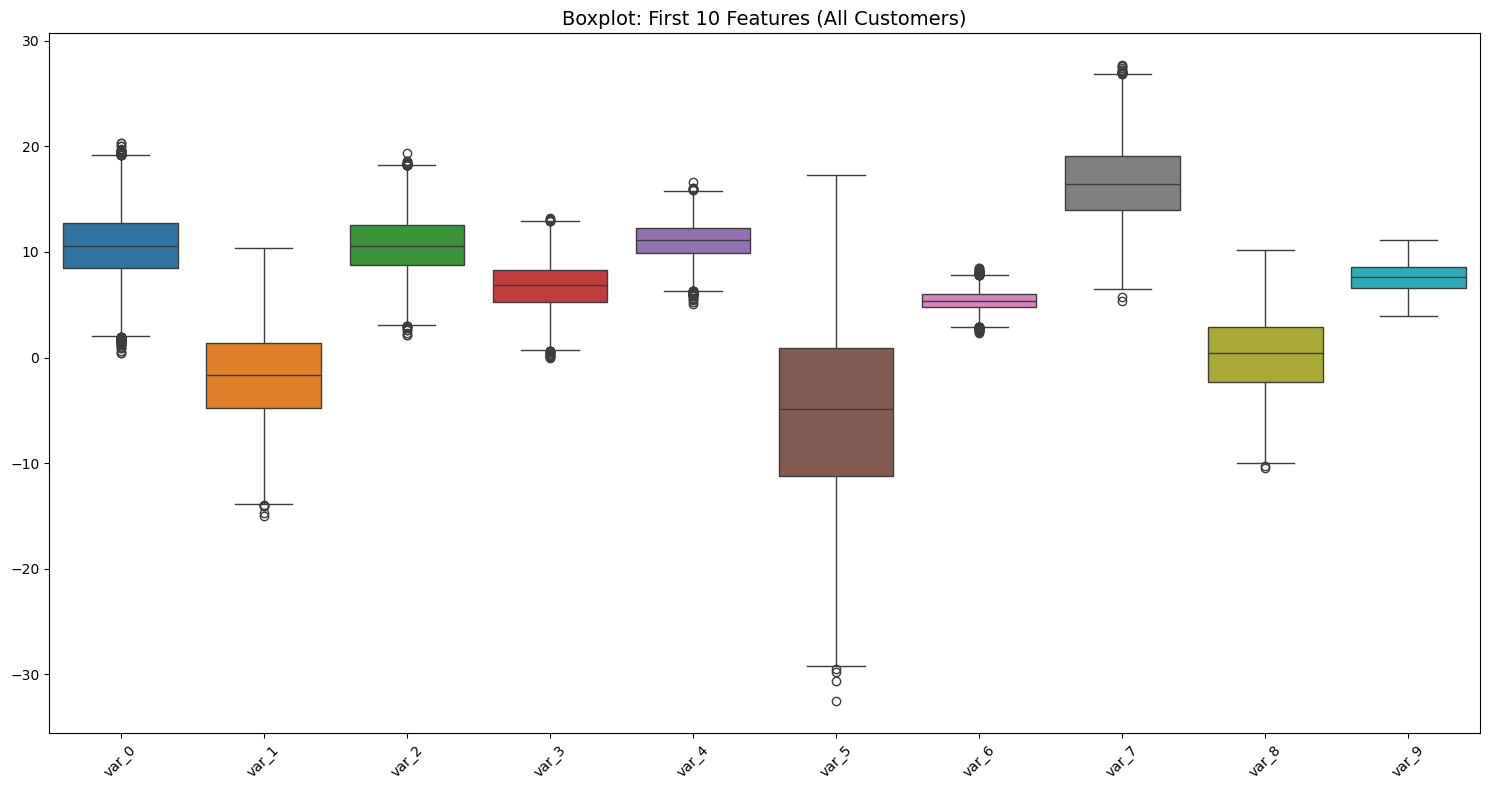

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for first 10 features
plt.figure(figsize=(15, 8))
sample_features = feature_cols[:10]

sns.boxplot(data=X[sample_features])
plt.title("Boxplot: First 10 Features (All Customers)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Boxplot: Compare target=0 vs target=1 (few features)

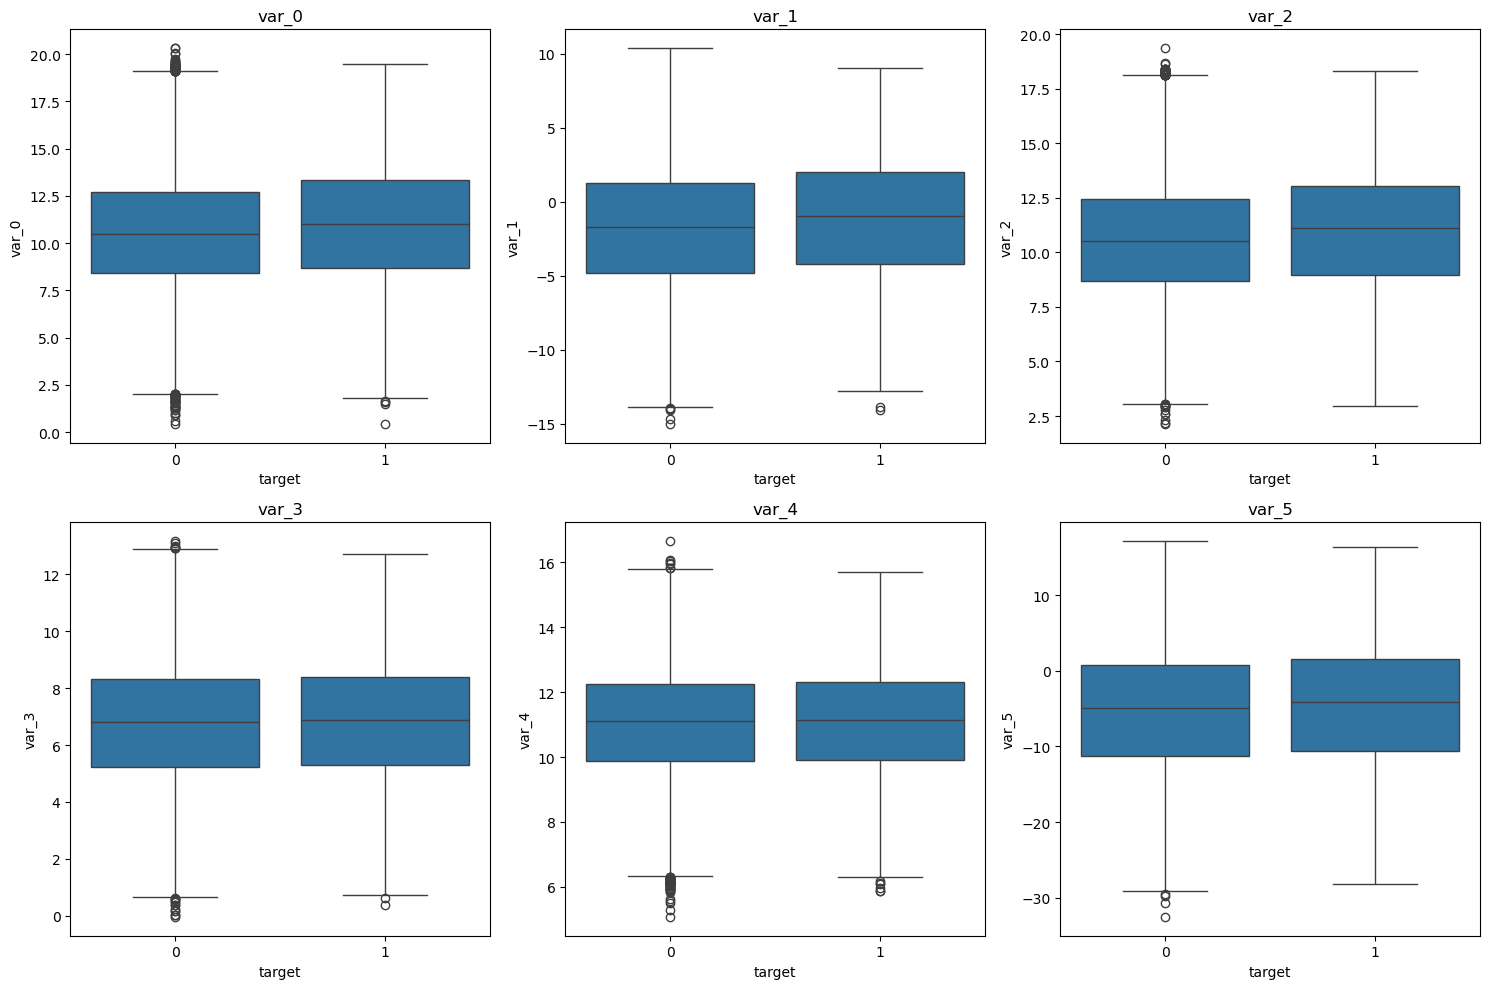

In [31]:
# Compare target=0 vs target=1 for first 6 features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sample_features = feature_cols[:6]

for i, col in enumerate(sample_features):
    row = i // 3
    col_pos = i % 3
    sns.boxplot(data=df, x="target", y=col, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f"{col}")

plt.tight_layout()
plt.show()


## Histogram: One feature for target=0 vs target=1

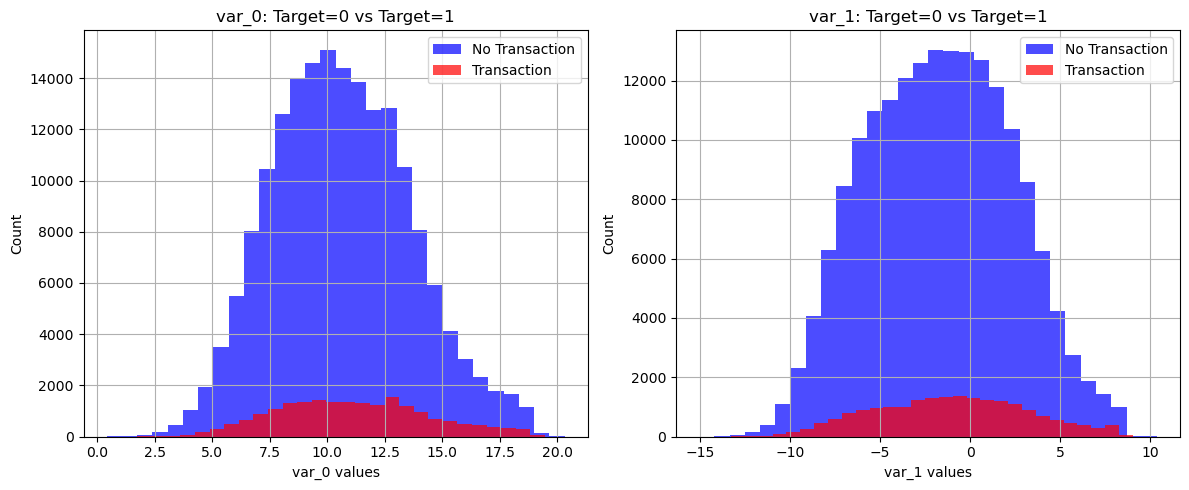

In [32]:
# Histogram comparison for var_0 (change to any var_ you want)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df[df["target"] == 0]["var_0"].hist(bins=30, alpha=0.7, color='blue', label='No Transaction')
df[df["target"] == 1]["var_0"].hist(bins=30, alpha=0.7, color='red', label='Transaction')
plt.title("var_0: Target=0 vs Target=1")
plt.xlabel("var_0 values")
plt.ylabel("Count")
plt.legend()

plt.subplot(1, 2, 2)
df[df["target"] == 0]["var_1"].hist(bins=30, alpha=0.7, color='blue', label='No Transaction')
df[df["target"] == 1]["var_1"].hist(bins=30, alpha=0.7, color='red', label='Transaction')
plt.title("var_1: Target=0 vs Target=1")
plt.xlabel("var_1 values")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error
import joblib

## Train/Test split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_capped,
    Y,
    test_size=0.2,      # 20% for testing
    stratify=Y,         # keep same 0/1 ratio in train and test
    random_state=42
)

In [53]:
print("\nTrain shapes:", X_train.shape, Y_train.shape)
print("Test shapes:", X_test.shape, Y_test.shape)


Train shapes: (160000, 200) (160000,)
Test shapes: (40000, 200) (40000,)


In [54]:
#Splits data into:
#Training set (80%) – used to fit the model.
#Test set (20%) – used to check how well model works on unseen data.

## Scale features (standardization)

In [55]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)   # learn mean/std on train and scale
X_test_s = scaler.transform(X_test)        # use same scaling on test

print("\nScaling done.")
print("Example of first row (scaled) from X_train_s:")
print(X_train_s[0][:10])   # first 10 features of first sample



Scaling done.
Example of first row (scaled) from X_train_s:
[ 1.55549158 -0.11525927 -0.0908863  -0.9326941   0.96836146  0.17042159
 -0.309792    0.33889827  1.18996751  0.88178365]


## Build and train Random Forest model

In [56]:
rf = RandomForestClassifier(
    n_estimators=300,        # number of trees
    random_state=42,
    n_jobs=-1,               # use all CPU cores
    class_weight="balanced"  # give more weight to minority class (1)
)

rf.fit(X_train_s, Y_train)

print("\nRandom Forest model trained.")



Random Forest model trained.


In [39]:
#Random Forest = many decision trees combined (ensemble).
#class_weight="balanced" helps the model pay more attention to rare class 1 (transactions).
#fit trains the model on training data.

## Feature importance AFTER training model

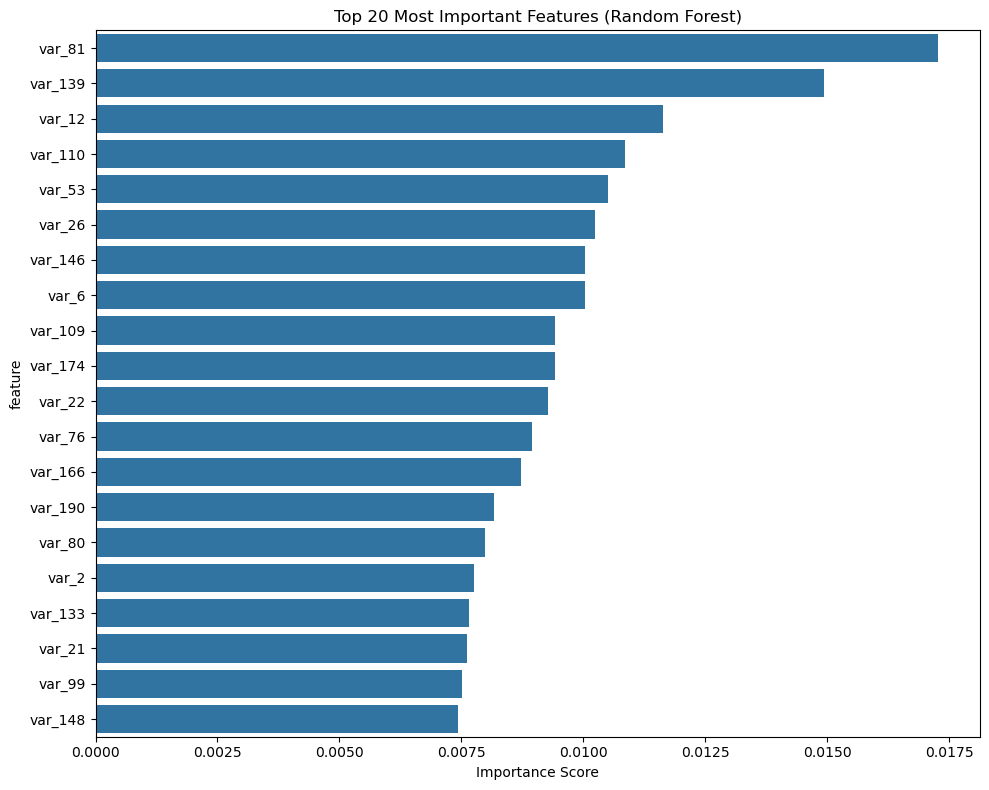

Top 10 features:
     feature  importance
81    var_81    0.017270
139  var_139    0.014927
12    var_12    0.011625
110  var_110    0.010847
53    var_53    0.010515
26    var_26    0.010249
146  var_146    0.010031
6      var_6    0.010028
109  var_109    0.009423
174  var_174    0.009419


In [40]:
# Feature importance from trained model
importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': importances
}).sort_values('importance', ascending=False)

# Top 20 most important features
top_20 = feature_importance.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_20, x='importance', y='feature')
plt.title("Top 20 Most Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

print("Top 10 features:")
print(top_20.head(10))


## Evaluate the model (AUC + classification report)

In [41]:
# 1. Get probability that each test sample is class 1
proba_test = rf.predict_proba(X_test_s)[:, 1]

In [42]:
# 2. Compute AUC (Area Under ROC curve)
auc = roc_auc_score(Y_test, proba_test)
print("\nAUC score:", auc)



AUC score: 0.8197509534041852


In [43]:
# 3. Turn probabilities into 0/1 predictions using a threshold
threshold = 0.5   # you can try 0.4 or 0.3 later
y_pred = (proba_test >= threshold).astype(int)

In [44]:
print("\nClassification report (threshold = 0.5):")
print(classification_report(Y_test, y_pred))


Classification report (threshold = 0.5):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35980
           1       0.00      0.00      0.00      4020

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000



C:\Users\ghote\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghote\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghote\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
#predict_proba gives probability of class 0 and 1; [:,1] selects prob of class 1.
#AUC score:
#0.5 ≈ random; closer to 1 is better. In your case you may see around 0.64–0.7 (example)
#threshold:
#If probability ≥ threshold → predict 1, else 0.
#Lower threshold → more predicted 1s (higher recall, more false positives).
#classification_report shows precision, recall, f1-score for each class.


#output for this code is AUC score printed.
#Table with precision/recall/f1 and support for classes 0 and 1.

## Model performance: ROC curve

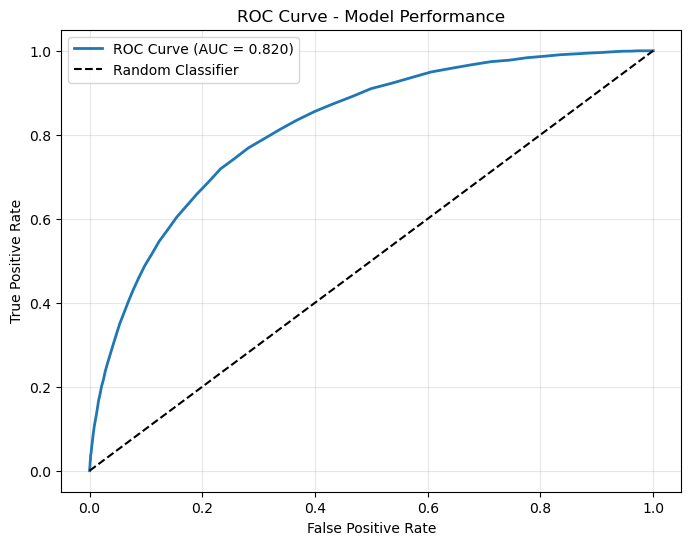

In [46]:
from sklearn.metrics import roc_curve

# ROC curve
fpr, tpr, _ = roc_curve(Y_test, proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Save model, scaler, and feature list

In [47]:
joblib.dump(rf, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(feature_cols, "feature_cols.pkl")

print("\nModel, scaler, and feature list saved to disk.")


Model, scaler, and feature list saved to disk.


In [48]:
#Saves:
#Trained Random Forest model → rf_model.pkl
#Fitted scaler → scaler.pkl
#List of feature column names → feature_cols.pkl
#You can reload them later without retraining.

## Use the model to predict new customers

In [49]:
####### Model are succesfully develop for this dataset and using this model we can predict the model and we can develop 
#######new model predict accuracy and precision

## create a Proper Comparison DataFrame

In [50]:
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
              'Decision Tree', 'Random Forest'],
    'R2_Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ]
})

model_results


NameError: name 'r2_score' is not defined